In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

In [2]:
df = pd.read_csv('../sat.trn',header=None,sep = '\s')

In [3]:
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

# 7-> 6 and 1-6 -> 0:5
y[y==7] = 6
for i in range(6):
    y[y == (i + 1)] = i

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
numbers = [*range(6)]
list_y = y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    print(digit, len(li))

0 1072
1 479
2 961
3 415
4 470
5 1038


In [6]:
def get_winner(class1, class2):
    
    numbers = [*range(6)] # number 2 > number 1
    number_of_classification = 2

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])


    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = len(class1_label) + len(class2_label)
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 20)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-satellite2")
    [stats, winner] = run(config_path)
    
    return winner

In [7]:
winner_list = []

for class1 in range(0,5):
    for class2 in range(class1+1,6):
        winner = get_winner(class1, class2)
        winner_list.append(winner)

number of class1:1072
number of class2:479

 ****** Running generation 0 ****** 

Population's average fitness: 0.40546 stdev: 0.18688
Best fitness: 0.97808 - size: (2, 7) - species 1 - id 4
Average adjusted fitness: 0.424
Mean genetic distance 2.901, standard deviation 0.509
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 4.616 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51577 stdev: 0.24230
Best fitness: 0.97808 - size: (2, 7) - species 8 - id 4
Average adjusted fitness: 0.477
Mean genetic distance 2.909, standard deviation 0.510
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 5.228 sec (4.922 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54500 stdev: 0.24802
Best fitness: 0.97808 - size: (2, 7) - species 8 - id 4
Average adjusted fitness: 0.475
Mean genetic distance 2.931, standard deviation 0.518
Population of 201 members in 29 species
Total extinctions: 0
Ge

Population's average fitness: 0.54207 stdev: 0.13217
Best fitness: 0.97442 - size: (3, 8) - species 5 - id 597
Average adjusted fitness: 0.459
Mean genetic distance 2.953, standard deviation 0.521
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 5.829 sec (5.343 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.54248 stdev: 0.12698
Best fitness: 0.97442 - size: (3, 8) - species 5 - id 597
Average adjusted fitness: 0.453
Mean genetic distance 2.951, standard deviation 0.509
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 5.964 sec (5.446 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.55178 stdev: 0.14722
Best fitness: 0.97442 - size: (3, 8) - species 5 - id 597
Average adjusted fitness: 0.465
Mean genetic distance 3.023, standard deviation 0.502
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 6.628 sec (5.615 average)

 ****** Running ge

Population's average fitness: 0.60571 stdev: 0.22324
Best fitness: 0.96032 - size: (4, 10) - species 18 - id 659
Average adjusted fitness: 0.517
Mean genetic distance 3.006, standard deviation 0.522
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 4.579 sec (4.671 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60911 stdev: 0.22549
Best fitness: 0.96032 - size: (4, 10) - species 18 - id 659
Average adjusted fitness: 0.334
Mean genetic distance 3.018, standard deviation 0.516
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 4.702 sec (4.674 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58707 stdev: 0.23654
Best fitness: 0.96570 - size: (6, 14) - species 8 - id 1686
Average adjusted fitness: 0.320
Mean genetic distance 3.000, standard deviation 0.525
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 4.648 sec (4.789 average)

 ****** Run

Mean genetic distance 3.109, standard deviation 0.503
Population of 199 members in 43 species
Total extinctions: 0
Generation time: 5.185 sec (5.341 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59875 stdev: 0.20486
Best fitness: 0.94163 - size: (4, 10) - species 10 - id 715
Average adjusted fitness: 0.404
Mean genetic distance 3.163, standard deviation 0.503
Population of 198 members in 45 species
Total extinctions: 0
Generation time: 6.409 sec (5.551 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59671 stdev: 0.20737
Best fitness: 0.94163 - size: (4, 10) - species 10 - id 715
Average adjusted fitness: 0.401
Mean genetic distance 3.177, standard deviation 0.494
Population of 199 members in 46 species
Total extinctions: 0
Generation time: 5.869 sec (5.690 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.59862 stdev: 0.21187
Best fitness: 0.94163 - size: (4, 10) - species 10 - id 715
Ave

Generation time: 8.024 sec (6.980 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64005 stdev: 0.19863
Best fitness: 0.99289 - size: (4, 10) - species 32 - id 1096
Average adjusted fitness: 0.560
Mean genetic distance 3.178, standard deviation 0.504
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 6.868 sec (7.013 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64993 stdev: 0.20569
Best fitness: 0.99289 - size: (4, 10) - species 32 - id 1096
Average adjusted fitness: 0.438
Mean genetic distance 3.168, standard deviation 0.519
Population of 192 members in 30 species
Total extinctions: 0
Generation time: 7.074 sec (7.069 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.64744 stdev: 0.19561
Best fitness: 0.99289 - size: (4, 10) - species 32 - id 1096
Average adjusted fitness: 0.159
Mean genetic distance 3.141, standard deviation 0.518
Population of 192 members in 

Population's average fitness: 0.51648 stdev: 0.15418
Best fitness: 0.96085 - size: (3, 8) - species 6 - id 329
Average adjusted fitness: 0.453
Mean genetic distance 2.949, standard deviation 0.516
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 2.312 sec (2.246 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55260 stdev: 0.15352
Best fitness: 0.96085 - size: (2, 8) - species 19 - id 493
Average adjusted fitness: 0.487
Mean genetic distance 2.963, standard deviation 0.527
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 2.464 sec (2.319 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57824 stdev: 0.17974
Best fitness: 0.96085 - size: (3, 8) - species 23 - id 329
Average adjusted fitness: 0.518
Mean genetic distance 2.994, standard deviation 0.523
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 2.485 sec (2.360 average)

 ****** Running 

Population's average fitness: 0.55657 stdev: 0.17072
Best fitness: 0.91781 - size: (4, 11) - species 23 - id 436
Average adjusted fitness: 0.464
Mean genetic distance 3.006, standard deviation 0.507
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 2.976 sec (2.681 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57247 stdev: 0.15624
Best fitness: 0.91781 - size: (4, 11) - species 23 - id 436
Average adjusted fitness: 0.397
Mean genetic distance 3.071, standard deviation 0.504
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 3.048 sec (2.734 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57188 stdev: 0.16424
Best fitness: 0.91781 - size: (4, 11) - species 23 - id 436
Average adjusted fitness: 0.490
Mean genetic distance 3.061, standard deviation 0.513
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 3.063 sec (2.775 average)

 ****** Runn

Population's average fitness: 0.69408 stdev: 0.25422
Best fitness: 0.99011 - size: (2, 9) - species 14 - id 898
Average adjusted fitness: 0.642
Mean genetic distance 3.049, standard deviation 0.553
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 4.846 sec (4.751 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.71188 stdev: 0.23776
Best fitness: 0.99011 - size: (2, 9) - species 14 - id 898
Average adjusted fitness: 0.577
Mean genetic distance 3.057, standard deviation 0.548
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 4.779 sec (4.707 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.69916 stdev: 0.24967
Best fitness: 0.99011 - size: (2, 9) - species 14 - id 898
Average adjusted fitness: 0.661
Mean genetic distance 3.043, standard deviation 0.531
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 5.446 sec (4.849 average)

 ****** Runni

Population's average fitness: 0.56835 stdev: 0.18493
Best fitness: 0.71148 - size: (4, 12) - species 29 - id 680
Average adjusted fitness: 0.259
Mean genetic distance 3.100, standard deviation 0.597
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 4.398 sec (4.795 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.57627 stdev: 0.18269
Best fitness: 0.71148 - size: (4, 12) - species 29 - id 680
Average adjusted fitness: 0.341
Mean genetic distance 3.103, standard deviation 0.579
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 4.855 sec (4.870 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.54927 stdev: 0.19110
Best fitness: 0.71148 - size: (4, 12) - species 29 - id 680
Average adjusted fitness: 0.239
Mean genetic distance 3.113, standard deviation 0.578
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 4.441 sec (4.768 average)

 ****** Ru

Generation time: 5.262 sec (4.865 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61267 stdev: 0.21453
Best fitness: 0.92523 - size: (5, 13) - species 23 - id 1253
Average adjusted fitness: 0.428
Mean genetic distance 3.086, standard deviation 0.532
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 4.995 sec (4.906 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.59321 stdev: 0.21664
Best fitness: 0.92523 - size: (5, 13) - species 23 - id 1253
Average adjusted fitness: 0.452
Mean genetic distance 3.082, standard deviation 0.528
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 5.521 sec (4.995 average)
number of class1:961
number of class2:1038

 ****** Running generation 0 ****** 

Population's average fitness: 0.50636 stdev: 0.02457
Best fitness: 0.56878 - size: (2, 7) - species 11 - id 176
Average adjusted fitness: 0.130
Mean genetic distance 2.811, standard devia

Population's average fitness: 0.52310 stdev: 0.05879
Best fitness: 0.89266 - size: (3, 8) - species 18 - id 328
Average adjusted fitness: 0.297
Mean genetic distance 3.045, standard deviation 0.524
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 2.449 sec (2.565 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.52654 stdev: 0.06793
Best fitness: 0.89266 - size: (3, 8) - species 18 - id 328
Average adjusted fitness: 0.343
Mean genetic distance 3.048, standard deviation 0.525
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 2.701 sec (2.599 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.52944 stdev: 0.08242
Best fitness: 0.89266 - size: (3, 8) - species 18 - id 328
Average adjusted fitness: 0.347
Mean genetic distance 3.056, standard deviation 0.522
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 2.882 sec (2.656 average)

 ****** Running

Population's average fitness: 0.61778 stdev: 0.17638
Best fitness: 0.72195 - size: (2, 7) - species 1 - id 163
Average adjusted fitness: 0.320
Mean genetic distance 2.955, standard deviation 0.567
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 3.904 sec (3.684 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63157 stdev: 0.16440
Best fitness: 0.72195 - size: (2, 7) - species 1 - id 163
Average adjusted fitness: 0.339
Mean genetic distance 2.948, standard deviation 0.556
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 4.074 sec (3.733 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63938 stdev: 0.15873
Best fitness: 0.72195 - size: (2, 7) - species 1 - id 163
Average adjusted fitness: 0.335
Mean genetic distance 2.973, standard deviation 0.557
Population of 208 members in 27 species
Total extinctions: 0
Generation time: 4.925 sec (3.865 average)

 ****** Running ge

Population's average fitness: 0.62831 stdev: 0.18620
Best fitness: 0.88727 - size: (4, 10) - species 4 - id 1098
Average adjusted fitness: 0.430
Mean genetic distance 3.124, standard deviation 0.529
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 5.294 sec (4.640 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62764 stdev: 0.18503
Best fitness: 0.88727 - size: (4, 10) - species 4 - id 1098
Average adjusted fitness: 0.364
Mean genetic distance 3.136, standard deviation 0.524
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 4.945 sec (4.738 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.61555 stdev: 0.19512
Best fitness: 0.88727 - size: (4, 10) - species 4 - id 1098
Average adjusted fitness: 0.438
Mean genetic distance 3.110, standard deviation 0.518
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 5.130 sec (4.773 average)

 ****** Ru

In [8]:
classes = []
for class1 in range(0,5):
    for class2 in range(class1+1, 6):
        classes.append([class1, class2])

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-satellite2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
test_df = pd.read_csv('../sat.tst',header=None,sep = '\s')

testX = test_df.iloc[:,:-1].to_numpy()
testy = test_df.iloc[:,-1].to_numpy()

# 7-> 6 and 1-6 -> 0:5
testy[testy==7] = 6
for i in range(6):
    testy[testy == (i + 1)] = i

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(6)]
    class1, class2 = classes[i]
    
    class1_indexes = []
    class2_indexes = []
    
    test_X = testX[j]
    test_y = testy[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    
    
    return pred_outputs

In [12]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []

for j in range(2000):
    pred = []
    vote = [0,0,0,0,0,0]
    for i in range(15):
        pred_outputs = get_pred_real(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1 #1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)

In [13]:
from random import randint
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [14]:
np.sum(list_P == testy)/2000

0.706

In [15]:
for i,p_value in enumerate(pred_value):
    print("#{} index:{} real:{}".format(i, p_value[0], testy[i]))

#0 index:[2] real:2
#1 index:[2] real:2
#2 index:[2] real:3
#3 index:[2] real:3
#4 index:[2] real:3
#5 index:[2] real:3
#6 index:[2] real:3
#7 index:[2] real:3
#8 index:[2] real:3
#9 index:[5] real:3
#10 index:[5] real:3
#11 index:[5] real:3
#12 index:[2 3 5] real:3
#13 index:[2] real:3
#14 index:[2] real:2
#15 index:[2] real:2
#16 index:[2] real:2
#17 index:[2] real:2
#18 index:[2] real:2
#19 index:[2] real:2
#20 index:[2] real:2
#21 index:[2] real:2
#22 index:[2] real:2
#23 index:[2] real:2
#24 index:[2] real:2
#25 index:[5] real:2
#26 index:[2] real:2
#27 index:[4] real:4
#28 index:[5] real:5
#29 index:[5] real:5
#30 index:[5] real:5
#31 index:[4] real:4
#32 index:[2] real:2
#33 index:[2] real:2
#34 index:[2] real:3
#35 index:[2] real:3
#36 index:[5] real:3
#37 index:[5] real:3
#38 index:[5] real:3
#39 index:[2] real:3
#40 index:[2] real:3
#41 index:[0] real:3
#42 index:[5] real:2
#43 index:[5] real:2
#44 index:[2] real:2
#45 index:[2] real:2
#46 index:[2] real:2
#47 index:[5] real:

#501 index:[1] real:1
#502 index:[1] real:1
#503 index:[1] real:1
#504 index:[1] real:1
#505 index:[3 5] real:5
#506 index:[5] real:5
#507 index:[5] real:5
#508 index:[5] real:5
#509 index:[5] real:5
#510 index:[5] real:2
#511 index:[5] real:5
#512 index:[5] real:5
#513 index:[5] real:5
#514 index:[5] real:5
#515 index:[2] real:5
#516 index:[4] real:4
#517 index:[4] real:4
#518 index:[4] real:4
#519 index:[4] real:4
#520 index:[4] real:4
#521 index:[1] real:1
#522 index:[1] real:1
#523 index:[1] real:1
#524 index:[2] real:3
#525 index:[5] real:3
#526 index:[2] real:3
#527 index:[1] real:1
#528 index:[1] real:1
#529 index:[1] real:1
#530 index:[1] real:1
#531 index:[5] real:5
#532 index:[5] real:2
#533 index:[5] real:5
#534 index:[5] real:5
#535 index:[5] real:5
#536 index:[2] real:5
#537 index:[5] real:5
#538 index:[2] real:5
#539 index:[4] real:4
#540 index:[4 5] real:4
#541 index:[4] real:4
#542 index:[4] real:4
#543 index:[4] real:4
#544 index:[4] real:4
#545 index:[1] real:1
#546 i

In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, testy)
print(cm)

[[443   1   3   1  23   1]
 [  2 202   0   0  17   0]
 [ 11   4 324 123  13 135]
 [  0   1   1   4   5  13]
 [  4  15   1   2 123   5]
 [  1   1  68  81  56 316]]


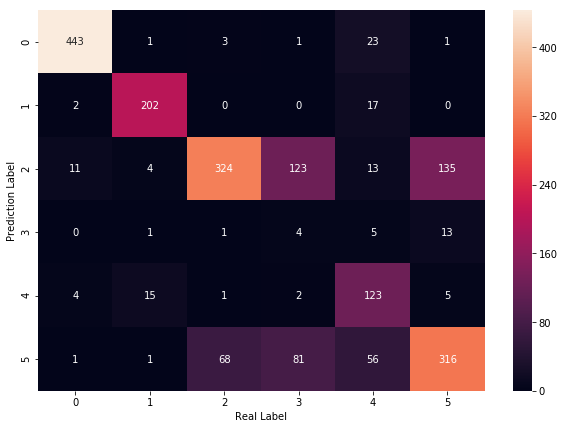

In [17]:
import seaborn as sn

df_cm = pd.DataFrame(cm, index = [i for i in "012345"],
                  columns = [i for i in "012345"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, fmt='.20g', annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()